#**Classification of Clothers (Fashion MNIST Dataset)**

#**Import Libraries**

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
from array import array

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#**Load and process the dataset**

##**Load the dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##**Preprocess the training and test data**

In [3]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train /= 255
x_test /= 255

##**Display the training and test data**
For the Fashion MNIST data set, the classes are:<br>
Label - Description<br>
0 - T-shirt/top<br>
1 - Trouser<br>
2 - Pullover<br>
3	- Dress<br>
4	- Coat<br>
5	- Sandal<br>
6	- Shirt<br>
7	- Sneaker<br>
8	- Bag<br>
9	- Ankle boot<br>

[27470, 39586, 46186, 3885, 17625, 27638, 21370, 33521, 11826]


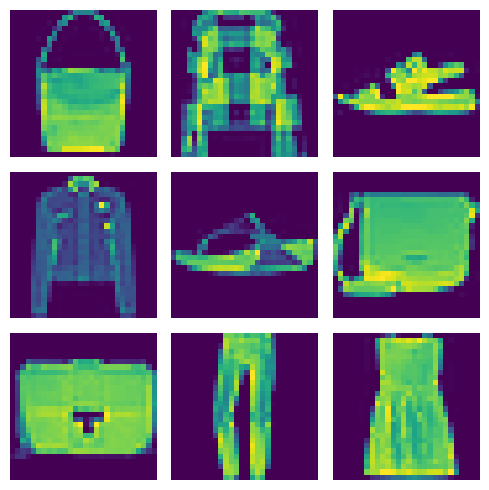

[[8 2 5]
 [4 5 8]
 [8 1 3]]


In [4]:
def show_random_images(num_images=9):
  # Select random indices
  indices = random.sample(range(len(x_train)), num_images)
  print(indices)

  # Reshape and normalize the images
  x_images = x_train[indices].reshape(-1,28,28)
  y_label = y_train[indices]

  # Create a figure and subplots
  fig, axes = plt.subplots(3, 3, figsize=(5, 5))

  # Plot each image on a subplot
  for i, image in enumerate(x_images):
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

  # Show the plot
  plt.tight_layout()
  plt.show()

  # Return corresponding labels
  print(y_label.reshape(3, 3))

show_random_images()

##**One-hot encode labels**

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

##**Add a validation dataset**

In [6]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

#**Build and train the model**

##**Define the model architecture**

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), name='conv2d_1'),
    MaxPooling2D((2, 2), name='maxpooling2d'),
    Flatten(),
    Dense(128, activation='relu', name='dense_1'),
    Dense(10, activation='softmax', name='dense_out')
])

##**Compile the model**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Train the model**

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 59s 34ms/step - loss: 0.3966 - accuracy: 0.8587 - val_loss: 0.2946 - val_accuracy: 0.8907
Epoch 2/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.2707 - accuracy: 0.9028 - val_loss: 0.2531 - val_accuracy: 0.9072
Epoch 3/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.2241 - accuracy: 0.9175 - val_loss: 0.2567 - val_accuracy: 0.9027
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1907 - accuracy: 0.9291 - val_loss: 0.2357 - val_accuracy: 0.9132
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1614 - accuracy: 0.9411 - val_loss: 0.2357 - val_accuracy: 0.9180
Epoch 6/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1376 - accuracy: 0.9492 - val_loss: 0.2363 - val_accuracy: 0.9202
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1141 - accuracy: 0.9575 - val_loss: 0.2573 -

#**Evaluate the model**

##**Display the model summary**

In [10]:
print(model.summary())
loss, accuracy = model.evaluate(x_test, y_test)
print('The accuracy is: ', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 maxpooling2d (MaxPooling2D  (None, 13, 13, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               692352    
                                                                 
 dense_out (Dense)           (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

##**Plot the loss and accuracy**

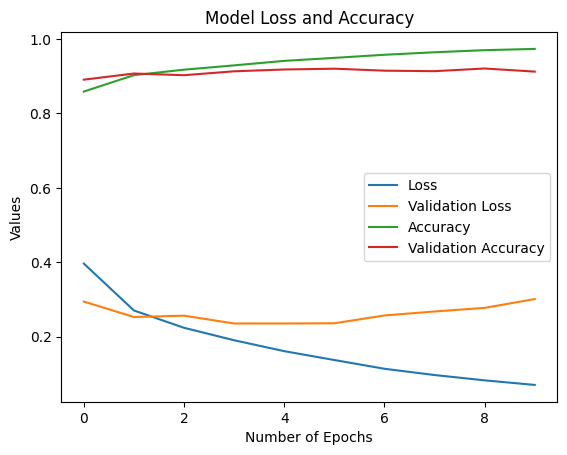

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Values')
plt.title('Model Loss and Accuracy')
plt.legend()
plt.show()

##**Display the confusion matrix**

313/313 [==============================] - 2s 6ms/step


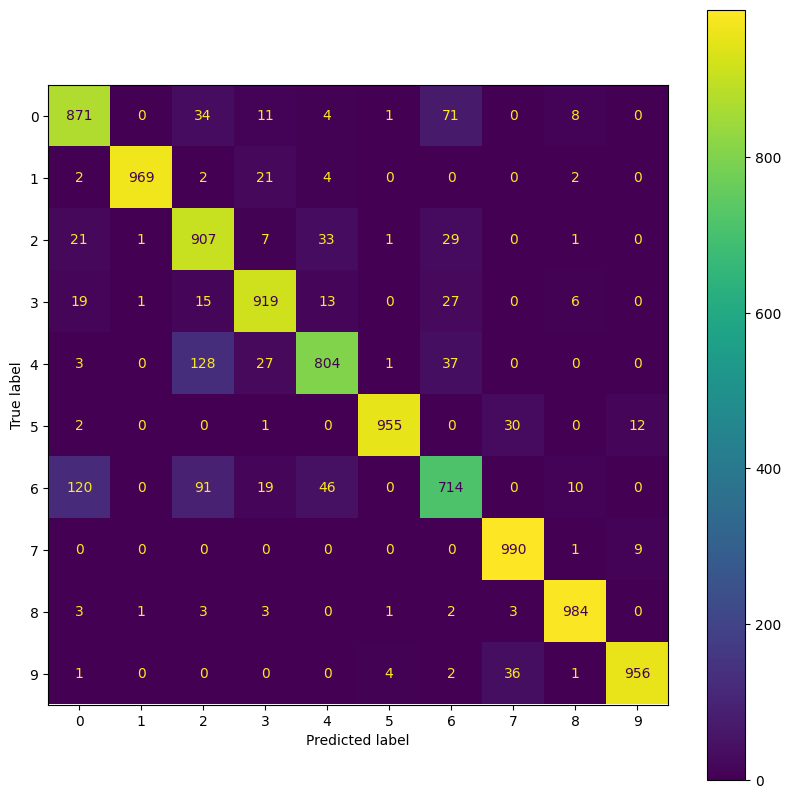

In [12]:
# Get predictions and true labels
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

##**Display all incorrect predictions**

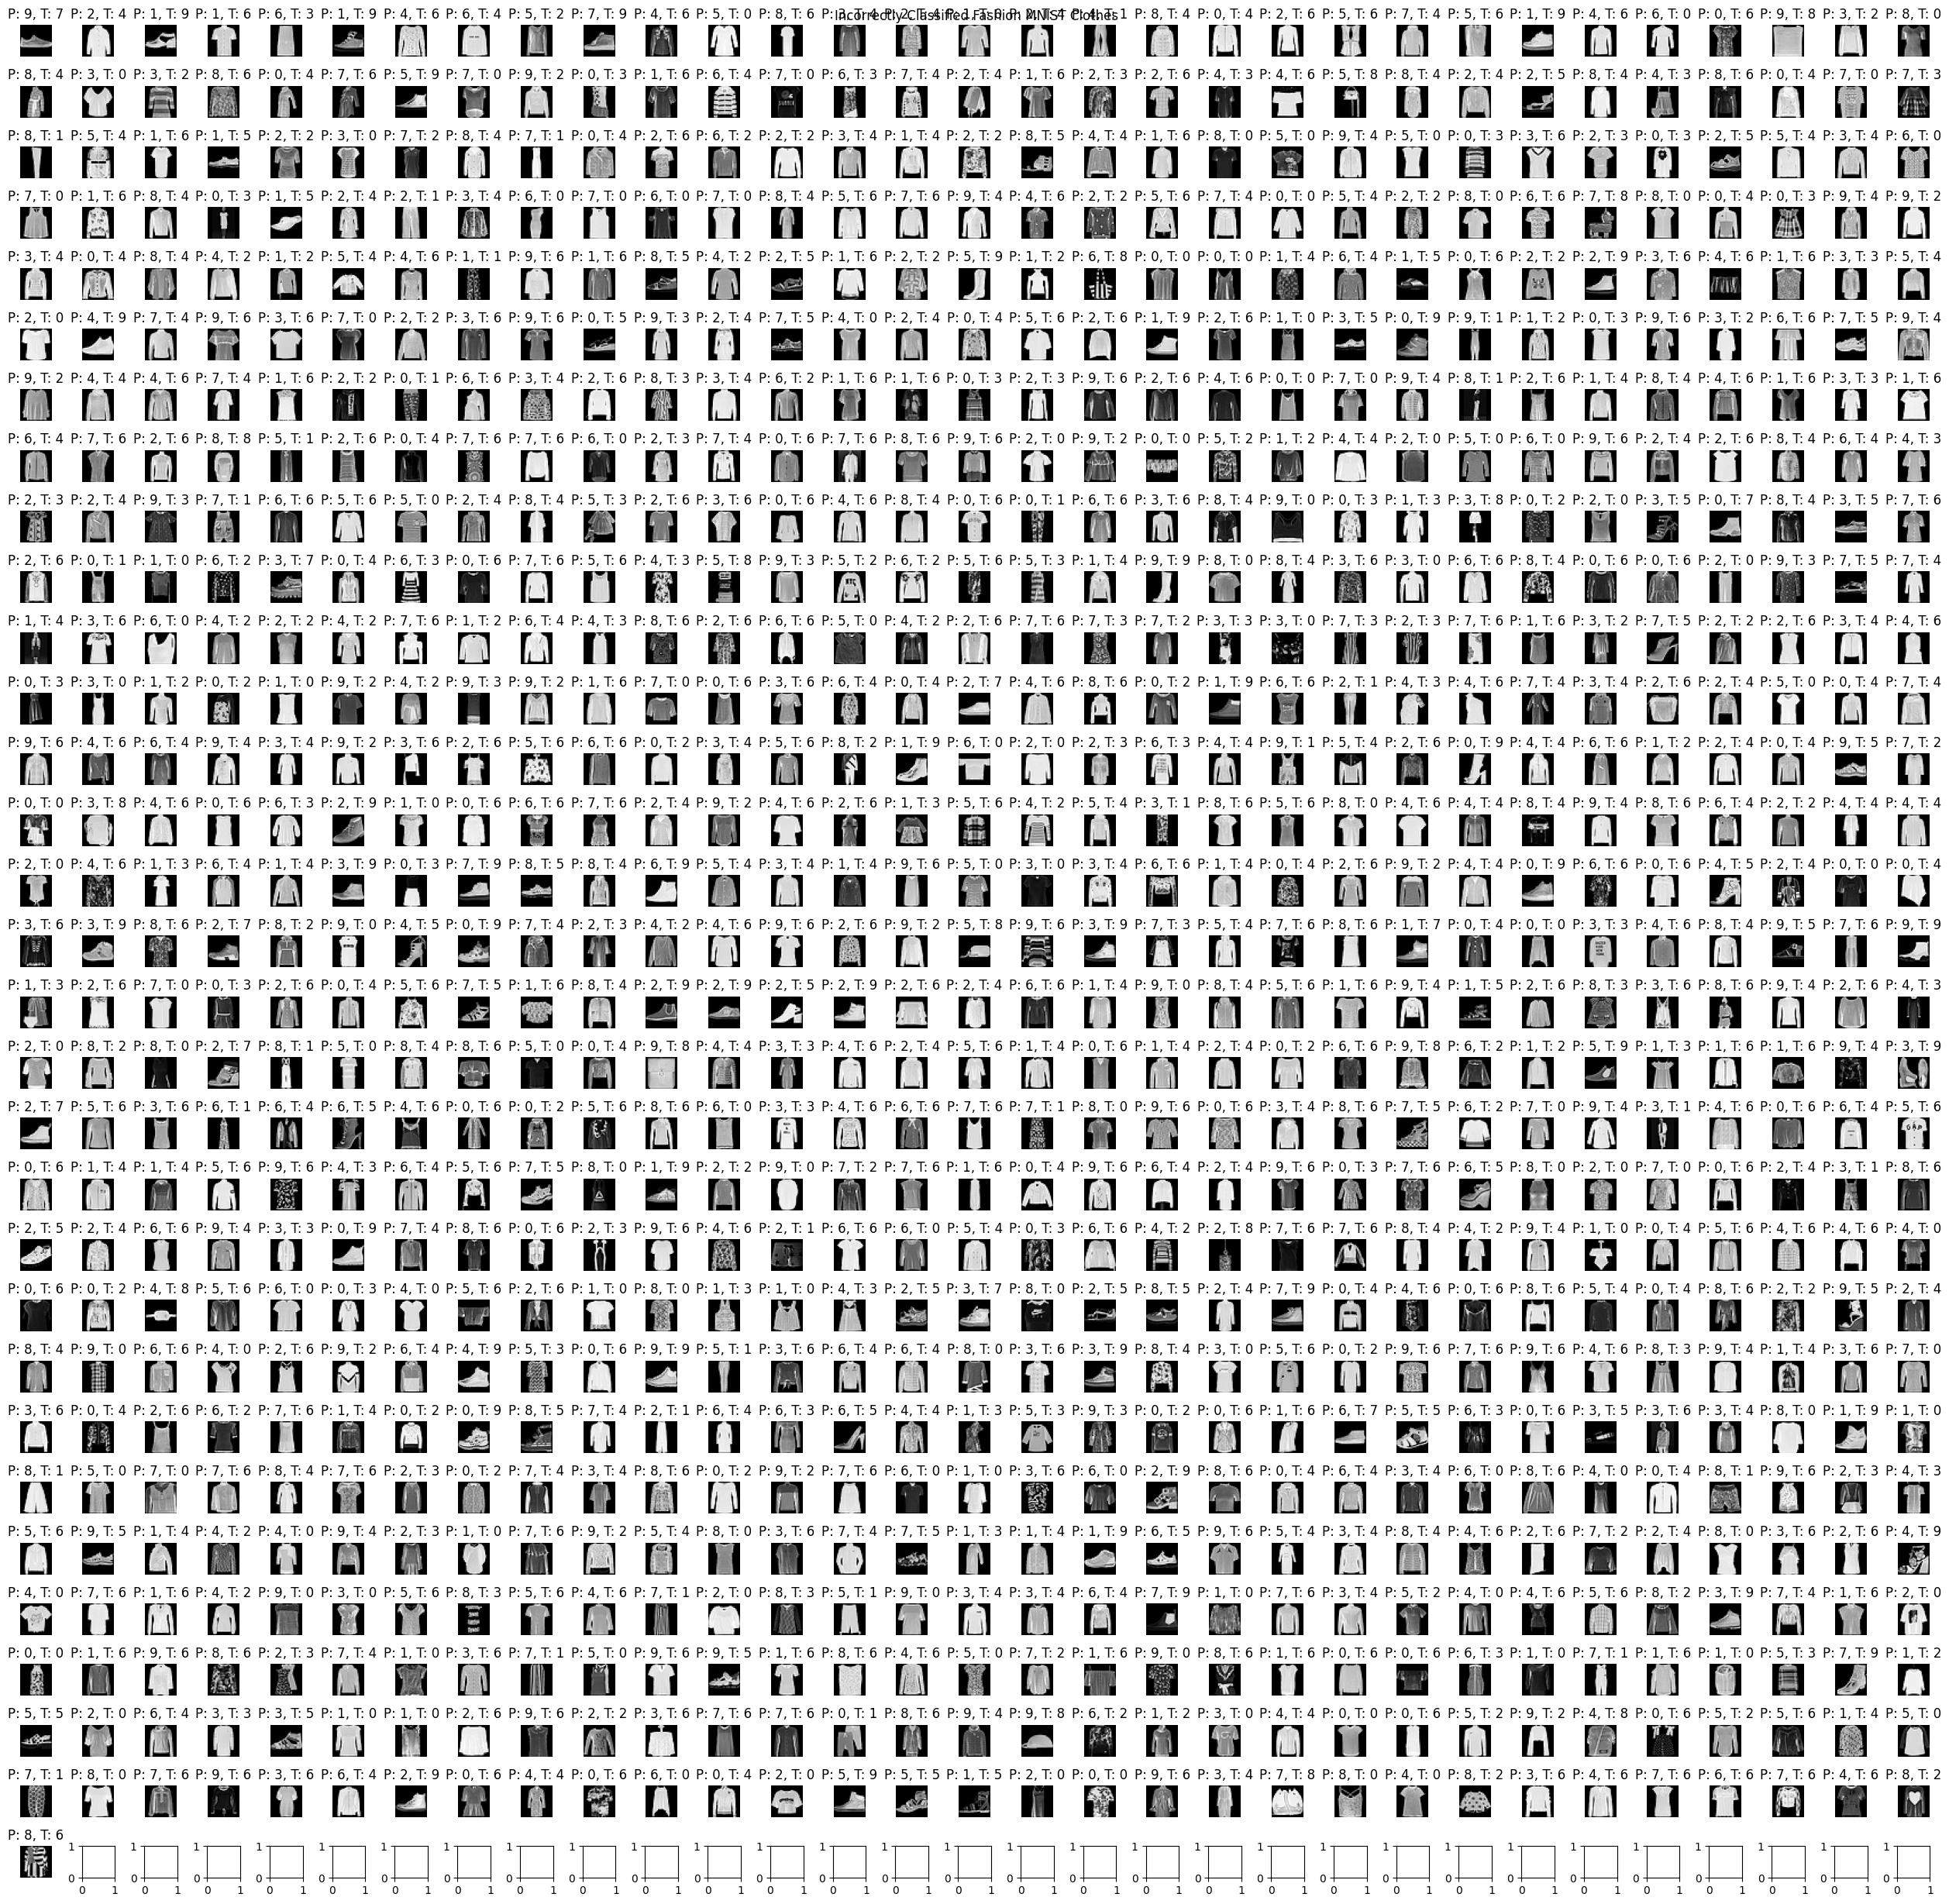

In [13]:
# Identify incorrect predictions
incorrect_indices = np.where(y_pred != y_true)[0]

# Define a function to plot images with labels
def plot_images_with_labels(images, labels, title=None):
  num_images = len(images)
  rows = int(np.ceil(np.sqrt(num_images)))
  cols = int(np.ceil(num_images / rows))

  fig, axes = plt.subplots(rows, cols, figsize=(25, 25))
  for i, (image, label) in enumerate(zip(images, labels)):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f"P: {y_pred[i]}, T: {label}")
    axes[row, col].axis('off')

  if title:
    fig.suptitle(title)
  plt.tight_layout()
  plt.show()

# Extract and plot incorrect predictions
incorrect_images = x_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices].argmax(axis=1)
plot_images_with_labels(incorrect_images, incorrect_labels, title='Incorrectly Classified Fashion MNIST Clothes')

##**Display 9 random misclassified images**

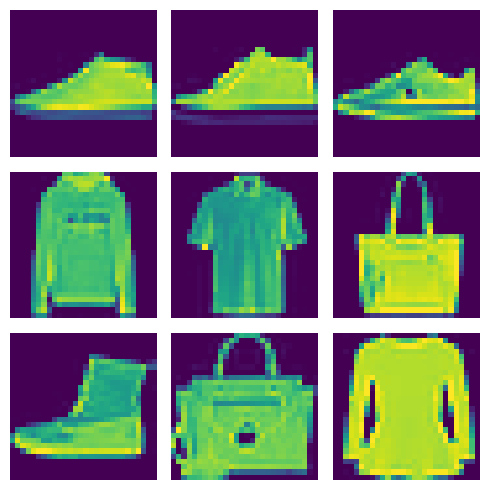

[[7 9 7]
 [2 6 8]
 [9 8 2]]


In [14]:
def show_random_misclassified_images(num_images=9):
  # Identify indices of misclassified images
  misclassified_images_idx = np.where(y_pred != y_true)[0]

  # Select random indices
  indices = random.sample(range(len(x_train)), num_images)

  # Reshape and normalize images
  x_images = x_train[indices].reshape(-1, 28, 28)
  y_label = y_train[indices]

  # Create a figure and subplot
  fig, axes = plt.subplots(3, 3, figsize=(5,5))

  # Plot each image on a subplot
  for i, image in enumerate(x_images):
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

  # Show the plot
  plt.tight_layout()
  plt.show()

  # Return corresponding labels
  print(y_label.argmax(axis=1).reshape(3, 3))

show_random_misclassified_images()

##**Visualizing intermediate activations**

###**Building the activation model**

In [36]:
layer_outputs = [layer.output for layer in model.layers[0:5]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

###**Choosing a random image from the test dataset on which we will use our activation model**

(-0.5, 27.5, 27.5, -0.5)

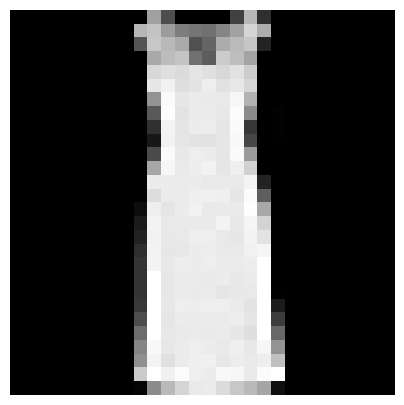

In [37]:
num = random.sample(range(len(x_test)), 1)
img = x_test[num].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

###**Output activations from selected layers**

In [38]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 115ms/step


###**Visualization of the activation layers**

['conv2d_1', 'maxpooling2d']
(1, 26, 26, 32)
(1, 13, 13, 32)


<ipython-input-84-baf9ef587ed1>:23: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


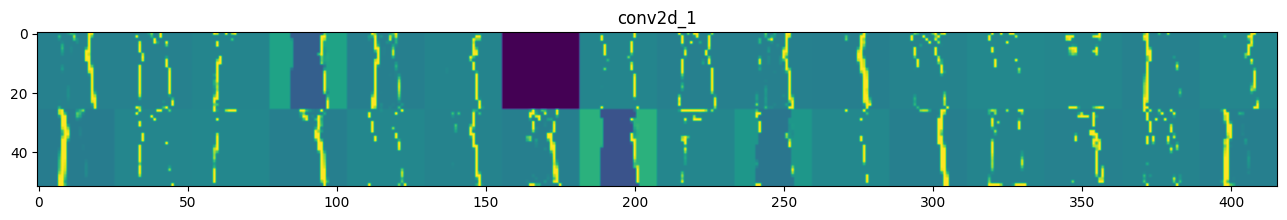

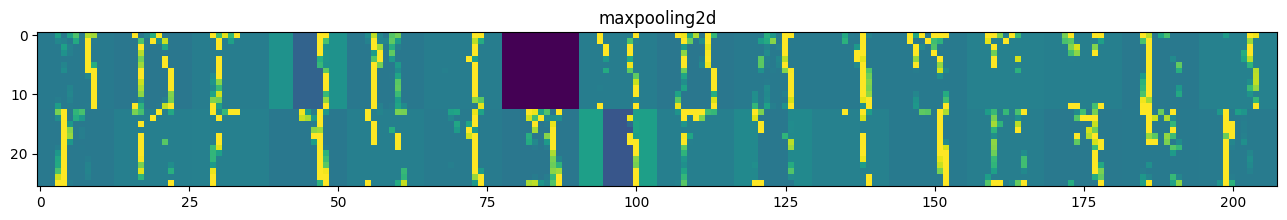

In [84]:
layer_names = []

for layer in model.layers[0:2]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
print(layer_names)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    print(layer_activation.shape)
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')